In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import os

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

## Make bed file index file

In [34]:
def make_index_file(directory,out_file):
    peaks=[x for x in os.listdir(directory) if ".bed" in x]
    with open(out_file,"w") as out_file:
        for x in peaks:
            out_file.write(directory+"/"+x+"\n")

## Get TF GREGOR output files

In [35]:
def get_gregor(directory):
    compiled=pd.read_csv(directory+"/StatisticSummaryFile.txt",delimiter="\t")
    compiled["ratio"]=(compiled["InBed_Index_SNP"]-compiled["ExpectNum_of_InBed_SNP"])/(compiled["ExpectNum_of_InBed_SNP"])
    return(compiled)

In [36]:
df=get_gregor("/cellar/users/tsears/projects/germline-immune/GREGOR/histone_V2/")

In [37]:
df["TF"]=df["Bed_File"].str.split(".").str[1]
df["cell"]=df["Bed_File"].str.split(".H").str[0]

### Get mean and standard error

In [38]:
df_mean=df[["TF","ratio"]].groupby("TF").mean()
df_std=df[["TF","ratio"]].groupby("TF").std()
df_counts=df["TF"].value_counts().reset_index()
df_counts=df_counts.set_index("index")

In [39]:
df_plot=pd.merge(df_mean, df_std, left_index=True, right_index=True)
df_plot=pd.merge(df_plot, df_counts, left_index=True, right_index=True)
df_plot.columns=["mean","std","num"]

In [40]:
df_plot["se"]=df_plot["std"]/np.sqrt(df_plot["num"])

In [41]:
df_plot=df_plot.sort_values(by="mean",ascending=False)

In [42]:
df_plot.index=df_plot.index.str.split("-").str[0]

In [43]:
df_plot

mean       std  num        se
H3K36me3  0.954971  0.331621   34  0.056873
H3K4me3   0.810203  0.274761   49  0.039252
H3K27ac   0.760402  0.452211   29  0.083974
H3K9ac    0.573820  0.217949   15  0.056274
H3K79me2  0.483815  0.089373    7  0.033780
H2AFZ     0.471051  0.181902    9  0.060634
H4K20me1  0.367864  0.409285    8  0.144704
H3K4me1   0.354978  0.374291   31  0.067225
H3K4me2   0.351758  0.297720    9  0.099240
H3K27me3 -0.003628  0.196921   35  0.033286
H3K9me3  -0.304257  0.258452   33  0.044991

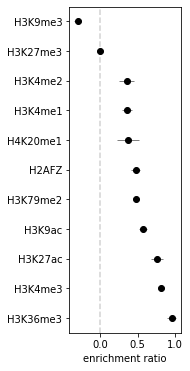

In [44]:
fig, ax = plt.subplots(figsize=(2, 6))
plt.errorbar(df_plot["mean"].tolist(),df_plot.index.tolist(), xerr=df_plot["se"].tolist(), fmt='o', color='black',
             ecolor='gray', elinewidth=1);
plt.axvline(0,linestyle="--",color="lightgray")
plt.xlabel("enrichment ratio")
plt.savefig("/cellar/users/tsears/projects/germline-immune/plots/fig3/histone.pdf",bbox_inches='tight')

### get cell types with at least 6 experiments

In [45]:
cell_counts=df["cell"].value_counts().reset_index()
cell_lst=cell_counts[cell_counts["cell"]>6]["index"].tolist()

In [46]:
compiled_filt=df[df["cell"].isin(cell_lst)]

In [47]:
cell_counts

index  cell
0                                    fibroblastoflung    11
1                               mammaryepithelialcell    11
2                              skeletalmusclemyoblast    11
3                      endothelialcellofumbilicalvein    11
4                                               Bcell    10
5                               CD14-positivemonocyte    10
6                                          osteoblast    10
7                                  fibroblastofdermis     9
8                         CD8-positivealpha-betaTcell     7
9                      peripheralbloodmononuclearcell     7
10                               foreskinkeratinocyte     7
11                        skeletalmusclesatellitecell     7
12                                       keratinocyte     7
13                                 foreskinmelanocyte     7
14               commonmyeloidprogenitorCD34-positive     6
15          effectormemoryCD4-positivealpha-betaTcell     6
16                        CD4-positivealpha-betaTcell     6
17                                 fibroblastofbreast     6
18                                        neurosphere     6
19                  CD4-positivealpha-betamemoryTcell     6
20                    myoepithelialcellofmammarygland     6
21                                             T-cell     6
22                                  naturalkillercell     6
23     naivethymus-derivedCD4-positivealpha-betaTcell     6
24  CD4-positiveCD25-positivealpha-betaregulatoryT...     6
25                                         neutrophil     6
26                                     T-helper17cell     6
27                  CD8-positivealpha-betamemoryTcell     6
28                                mesenchymalstemcell     6
29                                 foreskinfibroblast     6
30                                    regulatoryTcell     4
31                                          astrocyte     4
32                                    mononuclearcell     4
33                luminalepithelialcellofmammarygland     4
34                               kidneyepithelialcell     3
35                            bronchialepithelialcell     3
36                           astrocyteofthespinalcord     1
37                                  cardiacfibroblast     1
38                          epithelialcellofesophagus     1
39                  brainmicrovascularendothelialcell     1
40                     epithelialcellofproximaltubule     1
41                           epithelialcellofprostate     1
42                           astrocyteofthecerebellum     1
43                           fibroblastofmammarygland     1
44                       retinalpigmentepithelialcell     1
45                      fibroblastofvillousmesenchyme     1
46                        fibroblastofpulmonaryartery     1
47                                    mammarystemcell     1
48                                  cardiacmusclecell     1
49                    fibroblastoftheaorticadventitia     1
50                        choroidplexusepithelialcell     1
51                                 skeletalmusclecell     1

In [48]:
df_plot_cell=compiled_filt.pivot(index="TF",columns="cell",values="ratio")

In [49]:
df_plot_cell=df_plot_cell.loc[df_plot.index.tolist()]

In [50]:
df_plot_cell=df_plot_cell.fillna(0)

In [51]:
df_plot_cell=df_plot_cell.stack().reset_index()

In [52]:
df_plot_cell["TF"].value_counts()

H3K36me3    14
H3K4me3     14
H3K27ac     14
H3K9ac      14
H3K79me2    14
H2AFZ       14
H4K20me1    14
H3K4me1     14
H3K4me2     14
H3K27me3    14
H3K9me3     14
Name: TF, dtype: int64

In [53]:
df_plot_cell["color"]=np.where(df_plot_cell[0]>=0,1,-1)

In [54]:
n_colors = 256 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(220, 20, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

-1


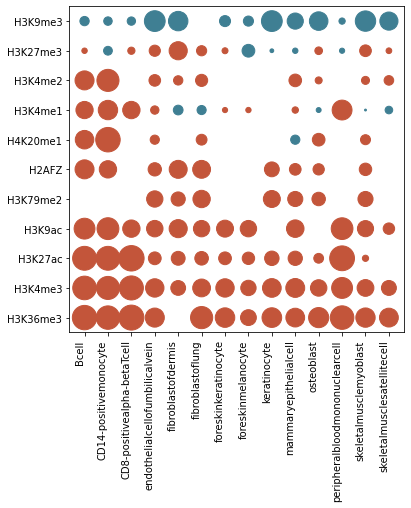

In [55]:
def heatmap(x, y, size,color):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in x.unique()]
    y_labels = [v for v in y.unique()]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    n_colors = 256 # Use 256 colors for the diverging color palette
    palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
    color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation
    
    print(color_min)
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, 
        c=color.apply(value_to_color)# Vector of square sizes, proportional to size parameter
        # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    plt.xticks(rotation=90)
    
heatmap(
    x=df_plot_cell['cell'],
    y=df_plot_cell["TF"],
    size=df_plot_cell[0].abs(),
    color=df_plot_cell["color"]
)
plt.savefig("/cellar/users/tsears/projects/germline-immune/plots/fig3/histone.epi.pdf")

In [56]:
df_size=df_plot_cell.copy()

In [57]:
df_size[0]=np.where(df_size["cell"]=="Bcell",1.2,df_size[0])
df_size[0]=np.where(df_size["cell"]=="CD14-positivemonocyte",0.8,df_size[0])
df_size[0]=np.where(df_size["cell"]=="CD8-positivealpha-betaTcell",0.6,df_size[0])

-1


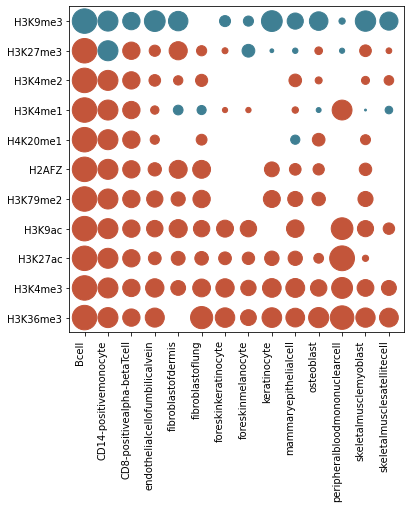

In [58]:
def heatmap(x, y, size,color):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in x.unique()]
    y_labels = [v for v in y.unique()]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    n_colors = 256 # Use 256 colors for the diverging color palette
    palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
    color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation
    
    print(color_min)
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, 
        c=color.apply(value_to_color)# Vector of square sizes, proportional to size parameter
        # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    plt.xticks(rotation=90)
    
heatmap(
    x=df_size['cell'],
    y=df_size["TF"],
    size=df_size[0].abs(),
    color=df_size["color"]
)
plt.savefig("/cellar/users/tsears/projects/germline-immune/plots/fig3/histone.epi.size.pdf",bbox_inches='tight')

In [59]:
supp=df_plot_cell[["TF","cell",0]]

In [60]:
supp.columns=["histone","cell","enrichment ratio"]

In [61]:
supp.to_csv("/cellar/users/tsears/projects/germline-immune/data/supplemental/Supplemental_Table_9.csv",index=None)

### Compile promoter bed files

In [62]:
encode_dir="/cellar/users/mpagadal/data/encode/combined-beds/histone/"
files=os.listdir(encode_dir)

In [63]:
keep_files=[]

for x in df_plot_cell["cell"].unique():
    keep_files.append(x+".H3K27ac.bed")
    keep_files.append(x+".H3K9ac.bed")
    

In [64]:
compiled_bed=pd.DataFrame()

for x in keep_files:
    try:
        bed=pd.read_csv(encode_dir+x,delimiter="\t",header=None)
        bed=bed[[0,1,2]]
        bed["type"]=x
        compiled_bed=compiled_bed.append(bed)
    except:
        print(x)

keratinocyte.H3K9ac.bed
osteoblast.H3K9ac.bed
skeletalmusclesatellitecell.H3K27ac.bed


In [33]:
compiled_bed.to_csv("../data/gregor/H3K27ac.H3K9ac.bed",index=None,header=None,sep="\t")